In [35]:
import fastai
from fastai.vision.all import *
from fastai import vision

In [4]:
#image path for from_folder function
path2="Chestx//"
image=get_image_files(path2)

In [5]:
#the training set is from train folder, and 1% of the images in the train folder is used as validation as original valid set is too small
#resize to keep images size consistent, batch size to fit gpu memory space
dls=ImageDataLoaders.from_folder(path2,train='train',valid_pct=0.1,item_tfms=Resize(384,'squish'), seed=42,bs=16) 

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [20]:
#resnet18 model
ptlearn18=vision_learner(dls, models.resnet18,pretrained=True, metrics=accuracy)

SuggestedLRs(valley=0.00363078061491251)

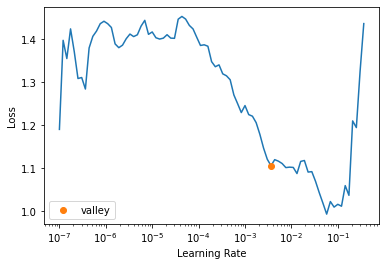

In [21]:
#finding learning rate
ptlearn18.lr_find()

In [22]:
#start the training of 50 epochs with callback to stop the training when valid_loss stop improving
ptlearn18.fit(50, 3e-3, cbs=EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=2))

epoch,train_loss,valid_loss,accuracy,time
0,0.220579,0.364738,0.904274,04:28
1,0.168077,0.198892,0.931624,04:42
2,0.176774,0.118105,0.960684,04:47
3,0.142481,0.097839,0.962393,04:38
4,0.143471,0.101800,0.962393,04:36
5,0.137932,0.103788,0.962393,04:41


No improvement since epoch 3: early stopping


In [33]:
#export resnet18 model
ptlearn18.export("resnet18")